# Udacity Data Wrangling Project

### Importing Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import requests


import twitter_credentials
%matplotlib inline

# Gather Part I

###  Gathering data with a Get Request

In [2]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
if response.status_code == 200:
    print('Success!')
elif response.status_code == 404:
    print('Not Found.')

Success!


### Importing data manually with Pandas

In [3]:
images = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')

In [4]:
df_1 = pd.read_csv('twitter_archive_enhanced.csv')

In [5]:
df_1.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                   'retweeted_status_user_id','retweeted_status_timestamp',
                   ], inplace=True)

# Assessment Part I 

In [6]:
images.duplicated().any()

False

In [7]:
df_1.query('tweet_id == "NaN"').count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [8]:
df_1.duplicated().any()

False

In [9]:
df_1[df_1.tweet_id.duplicated()].count()

tweet_id              7
timestamp             7
source                7
text                  7
expanded_urls         6
rating_numerator      7
rating_denominator    7
name                  7
doggo                 7
floofer               7
pupper                7
puppo                 7
dtype: int64

In [10]:
df_1.tweet_id.duplicated().any()

True

In [11]:
df_1.query('tweet_id == 0').count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [12]:
df_1.expanded_urls.isnull().any()

True

In [13]:
df_1.tweet_id.head()

0    8.924210e+17
1    8.921770e+17
2    8.918150e+17
3    8.916900e+17
4    8.913280e+17
Name: tweet_id, dtype: float64

In [14]:
with pd.option_context('float_format', '{:.0f}'.format):  
    print(df_1.tweet_id.head())

0   892421000000000000
1   892177000000000000
2   891815000000000000
3   891690000000000000
4   891328000000000000
Name: tweet_id, dtype: float64


# Cleaning the Data Part I 
### Summary of Assessments

### Creating a Cute Name Column to Tidy Data

In [15]:
df_1['cute_name'] = df_1['doggo'].str.cat(df_1['pupper']
                                         .replace('None','')).str.cat(df_1['floofer']
                                                                      .replace('None','')).str.cat(df_1['pupper']
                                                                                                   .replace('None','')).str.cat(df_1['puppo']
                                                                                                                                .replace('None',''))

In [16]:
df_1['cute_name'] = df_1.cute_name.replace('Nonefloofer','floofer')
df_1['cute_name'] = df_1.cute_name.replace('Nonepupper','pupper')
df_1['cute_name'] = df_1.cute_name.replace('Nonepuppo','puppo')
df_1['cute_name'] = df_1.cute_name.replace('None','Other')
df_1.drop(columns=['doggo', 'floofer','pupper', 'puppo'],inplace=True)

In [17]:
df_1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'cute_name'],
      dtype='object')

### Fixing an error in my data before using the Twitter API

In [18]:
df_1['expanded_urls'] = df_1.expanded_urls.fillna(value='https://www.twitter.com')
urls = df_1.expanded_urls
urls = list(urls)

In [19]:
status= []
for i in range(len(urls)): 
    t= urls[i]
    if bool(re.search(r'\d', t)) == True:
        twt = re.findall(r'\d+', t)[0]
        status.append(twt)
    else:
        status.append('NaN')
status[:5]

['892420643555336193',
 '892177421306343426',
 '891815181378084864',
 '891689557279858688',
 '891327558926688256']

In [20]:
df_1['tweet_id'] = status
df_1.tweet_id.isnull().any()

False

In [21]:
df_1['tweet_id'] = df_1.tweet_id.replace('NaN', 0)

In [22]:
df_1 = df_1.astype({'tweet_id':'int64'})

In [23]:
df_1 = df_1.drop_duplicates(keep='first')

In [24]:
len(df_1.expanded_urls) == len(status)

True

In [25]:
tweet_ids = status
len(tweet_ids)

2356

# Gather Part II

In [26]:
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
            
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)


In [27]:
#df_2 = pd.DataFrame(columns=['tweet_id','retweet count','favorite_count'])

#with open('tweet_json.txt') as i:
#    for line in i:
#        stat = json.loads(line)
#        tweet_id = stat['id_str']
#        retweet_count = stat['retweet_count']
#        favorite_count = stat['favorite_count']
#        df_2 = df_2.append(pd.DataFrame([[tweet_id,retweet_count,
#                                         favorite_count]], 
#                                       columns=['tweet_id',
#                                        'retweet_count', 'favorite_count']))
#df_2 = df_2.reset_index(drop=True)
#df_2.head()
        

In [28]:
#df_2.to_csv (r'C:\Users\tssan\Desktop\Udacity Projects\4wrangle\WeRateDogs.csv',
#                          index = None, header=True, sep='\t', encoding='utf-8')

In [29]:
df_2 = pd.read_csv('WeRateDogs.csv', sep='\t',encoding='utf-8')

## Assessment Part II

### Visual Assessment

In [30]:
df_2.head(50),df_2.tail(50)

(    favorite_count  retweet count  retweet_count            tweet_id
 0            37135            NaN         7937.0  892420643555336193
 1            31939            NaN         5900.0  892177421306343426
 2            24054            NaN         3899.0  891815181378084864
 3            40456            NaN         8095.0  891689557279858688
 4            38672            NaN         8778.0  891327558926688256
 5            19442            NaN         2917.0  891087950875897856
 6            11340            NaN         1937.0  890971913173991426
 7            62632            NaN        17701.0  890729181411237888
 8            26740            NaN         4020.0  890609185150312448
 9            30632            NaN         6903.0  890240255349198849
 10           29483            NaN         6874.0  890006608113172480
 11           26734            NaN         4683.0  889880896479866881
 12           46147            NaN         9418.0  889665388333682689
 13           26017 

### Programatic Assessment

In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 4 columns):
favorite_count    2166 non-null int64
retweet count     0 non-null float64
retweet_count     2166 non-null float64
tweet_id          2166 non-null int64
dtypes: float64(2), int64(2)
memory usage: 67.8 KB


Ask Questions about the data
Anything out of place? 
Too large? Too small? 


In [32]:
df_2.duplicated().any()

True

In [33]:
df_2.drop(columns='retweet count', inplace= True)

In [34]:
df_2 = df_2.drop_duplicates(keep='first')

In [35]:
len(df_1), len(df_2)

(2356, 2032)

In [36]:
df = df_1.merge(df_2, on='tweet_id', how='inner')

In [37]:
len(df)

2179

In [38]:
df.query('tweet_id == 0').count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
cute_name             0
favorite_count        0
retweet_count         0
dtype: int64

In [39]:
df.tweet_id.duplicated().any()

True

In [40]:
df = df.drop_duplicates(subset=['tweet_id'],keep='first')

In [41]:
len(df)

2026

In [42]:
df = df.merge(images, on='tweet_id', how='inner')

In [43]:
df = df.reset_index(drop=True)
# Get rid of <source, rating_denominator, tweet_status,jpg_url, img_num>
df.drop(columns=['source','img_num'],inplace=True)

In [44]:
df.query('rating_denominator > 10')['rating_denominator']

336      70
602      11
694     150
873     170
915      20
948      50
969      90
991      80
1009     50
1073     50
1144     40
1311    130
1312    110
1336     11
1436    120
1494     80
Name: rating_denominator, dtype: int64

In [45]:
df.query('rating_denominator < 10')

tweet_id                  timestamp  \
401   810984652412424192  2016-12-19 23:06:23 +0000   
1959  666287406224695296  2015-11-16 16:11:11 +0000   

                                                   text  \
401   Meet Sam. She smiles 24/7 &amp; secretly aspir...   
1959  This is an Albanian 3 1/2 legged  Episcopalian...   

                                          expanded_urls  rating_numerator  \
401   https://www.gofundme.com/sams-smile,https://tw...                24   
1959  https://twitter.com/dog_rates/status/666287406...                 1   

      rating_denominator name cute_name  favorite_count  retweet_count  \
401                    7  Sam     Other            5578         1518.0   
1959                   2   an     Other             141           63.0   

                                              jpg_url                p1  \
401   https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg  golden_retriever   
1959  https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg       Maltese_dog   

       p1_conf  p1_dog               p2   p2_conf  p2_dog                  p3  \
401   0.871342    True  Tibetan_mastiff  0.036708    True  Labrador_retriever   
1959  0.857531    True       toy_poodle  0.063064    True    miniature_poodle   

       p3_conf  p3_dog  
401   0.025823    True  
1959  0.025581    True

In [46]:
df.text[401],df.text[1959]

('Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv')

In [47]:
df.groupby(['rating_numerator']).count()

tweet_id  timestamp  text  expanded_urls  \
rating_numerator                                             
0                        2          2     2              2   
1                        5          5     5              5   
2                        9          9     9              9   
3                       19         19    19             19   
4                       16         16    16             16   
5                       33         33    33             33   
6                       32         32    32             32   
7                       52         52    52             52   
8                       95         95    95             95   
9                      151        151   151            151   
10                     418        418   418            418   
11                     394        394   394            394   
12                     445        445   445            445   
13                     254        254   254            254   
14                      35         35    35             35   
24                       1          1     1              1   
26                       1          1     1              1   
27                       1          1     1              1   
44                       1          1     1              1   
45                       1          1     1              1   
50                       1          1     1              1   
60                       1          1     1              1   
75                       1          1     1              1   
80                       1          1     1              1   
84                       1          1     1              1   
88                       1          1     1              1   
99                       1          1     1              1   
121                      1          1     1              1   
143                      1          1     1              1   
144                      1          1     1              1   
165                      1          1     1              1   
204                      1          1     1              1   
420                      1          1     1              1   
1776                     1          1     1              1   

                  rating_denominator  name  cute_name  favorite_count  \
rating_numerator                                                        
0                                  2     2          2               2   
1                                  5     5          5               5   
2                                  9     9          9               9   
3                                 19    19         19              19   
4                                 16    16         16              16   
5                                 33    33         33              33   
6                                 32    32         32              32   
7                                 52    52         52              52   
8                                 95    95         95              95   
9                                151   151        151             151   
10                               418   418        418             418   
11                               394   394        394             394   
12                               445   445        445             445   
13                               254   254        254             254   
14                                35    35         35              35   
24                                 1     1          1               1   
26                                 1     1          1               1   
27                                 1     1          1               1   
44                                 1     1          1               1   
45                                 1     1          1               1   
50                                 1     1          1               1   
60                                 1     1          1               1   
75                               

In [48]:
df[df['rating_numerator'] == 75]

tweet_id                  timestamp  \
262  786709082849828864  2017-02-16 13:11:49 +0000   

                                                  text  \
262  RT @dog_rates: This is Logan, the Chow who liv...   

                                         expanded_urls  rating_numerator  \
262  https://twitter.com/dog_rates/status/786709082...                75   

     rating_denominator   name cute_name  favorite_count  retweet_count  \
262                  10  Logan     Other           19055         6425.0   

                                             jpg_url          p1   p1_conf  \
262  https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg  Pomeranian  0.467321   

     p1_dog           p2   p2_conf  p2_dog    p3   p3_conf  p3_dog  
262    True  Persian_cat  0.122978   False  chow  0.102654    True

In [49]:
df.text[262]

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

## Data Cleaning
### Summary of Assessments
Spotting Errors in Numerators & Denominators

In [50]:
df.loc[1959, 'rating_denominator']= 10
df.loc[1959, 'rating_numerator']= 9

In [51]:
df.loc[401, 'rating_numerator']= np.median(df.rating_numerator)
df.loc[401, 'rating_denominator']= np.median(df.rating_denominator)

#### Normalizing Denominators to a Standard of 10  

In [52]:
norm_numerator= []
norm_denominator= []
for i, row in df.iterrows():
    norm = 10 / row['rating_denominator']
    num = row['rating_numerator'] = row['rating_numerator']* norm
    norm_numerator.append(num)
    den = row['rating_denominator'] = row['rating_denominator']* norm
    norm_denominator.append(den)
    

In [53]:
df['rating_numerator'] = norm_numerator
df['rating_denominator'] = norm_denominator

In [54]:
df.query('rating_denominator !=10')['rating_denominator'].any()

False

### Correcting Ratings Containing Decimal Places

#### Using Regular Expression to loop through each text and pull out any digits with decimal places  

In [55]:
for i, row in df.iterrows():
    in_str= row['text']
    split = re.split(r'/' , in_str)[0]
    if bool(re.search(r'\d+\.\d+$', split)) == True:
        after = re.findall(r'\d+\.\d+', split)[0]
        before = df.loc[i, 'rating_numerator']
        df.loc[i, 'rating_numerator'] = after
        print(f"The numerator in row {i} used to be {before} and now is {after}.")
    else:
        pass

The numerator in row 40 used to be 5.0 and now is 13.5.
The numerator in row 262 used to be 75.0 and now is 9.75.
The numerator in row 585 used to be 27.0 and now is 11.27.
The numerator in row 1380 used to be 26.0 and now is 11.26.


In [56]:
df['rating_numerator'] = df['rating_numerator'].astype('float64')
df['rating_denominator'] = df['rating_denominator'].astype('float64')

In [57]:
#No longer need the denominator columns, and the rating_numerator column
#can just become rating (on a standardized scale of 10)
df.drop(columns=['rating_denominator'])
df.rename(columns={"rating_numerator": "rating"},inplace=True)

In [58]:
df.groupby(['rating']).count()

tweet_id  timestamp  text  expanded_urls  rating_denominator  \
rating                                                                      
0.000000            2          2     2              2                   2   
1.000000            4          4     4              4                   4   
2.000000           10         10    10             10                  10   
3.000000           19         19    19             19                  19   
4.000000           15         15    15             15                  15   
5.000000           32         32    32             32                  32   
6.000000           32         32    32             32                  32   
6.363636            1          1     1              1                   1   
7.000000           51         51    51             51                  51   
8.000000           95         95    95             95                  95   
8.181818            1          1     1              1                   1   
9.000000          152        152   152            152                 152   
9.750000            1          1     1              1                   1   
10.000000         420        420   420            420                 420   
11.000000         401        401   401            401                 401   
11.260000           1          1     1              1                   1   
11.270000           1          1     1              1                   1   
12.000000         449        449   449            449                 449   
13.000000         254        254   254            254                 254   
13.500000           1          1     1              1                   1   
14.000000          35         35    35             35                  35   
420.000000          1          1     1              1                   1   
1776.000000         1          1     1              1                   1   

             name  cute_name  favorite_count  retweet_count  jpg_url   p1  \
rating                                                                      
0.000000        2          2               2              2        2    2   
1.000000        4          4               4              4        4    4   
2.000000       10         10              10             10       10   10   
3.000000       19         19              19             19       19   19   
4.000000       15         15              15             15       15   15   
5.000000       32         32              32             32       32   32   
6.000000       32         32              32             32       32   32   
6.363636        1          1               1              1        1    1   
7.000000       51         51              51             51       51   51   
8.000000       95         95              95             95       95   95   
8.181818        1          1               1              1        1    1   
9.000000      152        152             152            152      152  152   
9.750000        1          1               1              1        1    1   
10.000000     420        420             420            420      420  420   
11.000000     401        401             401            401      401  401   
11.260000       1          1               1              1        1    1   
11.270000       1          1               1              1        1    1   
12.000000     449        449             449            449      449  449   
13.000000     254        254             254            254      254  254   
13.500000       1          1               1              1        1    1   
14.000000      35         35              35             35       35   35   
420.000000      1          1               1              1        1    1   
1776.000000     1          1               1              1        1    1   

             p1_conf  p1_dog   p2  p2_conf  p2_dog   p3  p3_conf  p3_dog  
rating                                                                    
0.000000   

In [59]:
df[df['rating'] == 420]

tweet_id                  timestamp  \
1712  670842764863651840  2015-11-29 05:52:33 +0000   

                                                   text  \
1712  After so many requests... here you go.\r\n\r\n...   

                                          expanded_urls  rating  \
1712  https://twitter.com/dog_rates/status/670842764...   420.0   

      rating_denominator  name cute_name  favorite_count  retweet_count  \
1712                10.0  None     Other           24351         8574.0   

                                              jpg_url          p1   p1_conf  \
1712  https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg  microphone  0.096063   

      p1_dog         p2   p2_conf  p2_dog         p3   p3_conf  p3_dog  
1712   False  accordion  0.094075   False  drumstick  0.061113   False

In [60]:
df.text[1712]

'After so many requests... here you go.\r\n\r\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [61]:
print(df.jpg_url[1712])

https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg


## At second place Snoop Dogg comes in at very impressive 420 out of 10
<img src="second.jpg"/>

In [62]:
df[df['rating'] == 1776]

tweet_id                  timestamp  \
757  749981277374128128  2016-07-04 15:00:45 +0000   

                                                  text  \
757  This is Atticus. He's quite simply America af....   

                                         expanded_urls  rating  \
757  https://twitter.com/dog_rates/status/749981277...  1776.0   

     rating_denominator     name cute_name  favorite_count  retweet_count  \
757                10.0  Atticus     Other            5253         2528.0   

                                             jpg_url       p1   p1_conf  \
757  https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg  bow_tie  0.533941   

     p1_dog          p2   p2_conf  p2_dog        p3   p3_conf  p3_dog  
757   False  sunglasses  0.080822   False  sunglass  0.050776   False

In [63]:
df.text[757]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [64]:
print(df.jpg_url[757])

https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg


## Congratulation to the winner coming in at 1776 out of 10, no easy feat!
<img src="winner.jpg"/>

These data points were accurately gathered, but are global outliers that greatly increase the standard deviation.  
Because of this, I decided to remove the two remaining outliers, and only evaluated the observations of 14 or less.

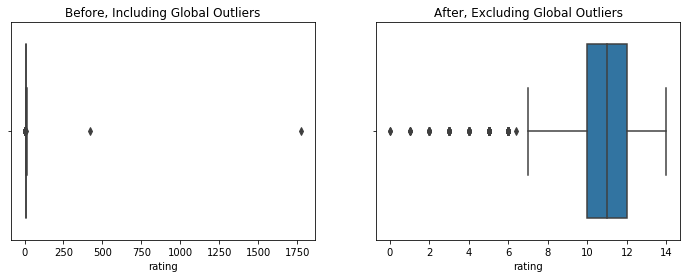

In [65]:
df_before= df.copy()
df = df[df['rating'] < 15]

#df_before= plots of the distribution of the data before and after removing the two outliers
f, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(data=df_before,x= 'rating',orient='w', ax=axes[0])
axes[0].set_title('Before, Including Global Outliers')


sns.boxplot(data=df, x= 'rating',orient='w', ax=axes[1])
axes[1].set_title('After, Excluding Global Outliers');

# Distribution of Dog Ratings

In [66]:
df_rate = df.copy()

In [67]:
# Rounding Ratings to get a discrete scale
for i, row in df_rate.iterrows():
    before = df_rate.loc[i, 'rating']
    after = round(df_rate.rating[i], 0)
    df_rate.loc[i, 'rating'] = after
    if bool(before == after) == False :
        print(f"The rating in row {i} used to be {before} and now is {after}.")
    else:
        pass

The rating in row 40 used to be 13.5 and now is 14.0.
The rating in row 262 used to be 9.75 and now is 10.0.
The rating in row 585 used to be 11.27 and now is 11.0.
The rating in row 602 used to be 8.181818181818182 and now is 8.0.
The rating in row 1336 used to be 6.363636363636363 and now is 6.0.
The rating in row 1380 used to be 11.26 and now is 11.0.


In [68]:
df_rate['p1'].value_counts()

golden_retriever      138
Labrador_retriever     92
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
polecat                 1
otter                   1
cup                     1
cash_machine            1
shopping_basket         1
Name: p1, Length: 372, dtype: int64

In [69]:
dog_types = df_rate['p1'].value_counts().keys()
dog_types = list(dog_types)

In [70]:
dog_types = dog_types[:9]

In [71]:
for d in dog_types:
    df_other = df_rate[(df_rate.p1 != d)]

df_other = df_other.rating.value_counts().sort_index()
df_other = df_other.rename_axis('rating').to_frame('other')

for d in dog_types:
    df_add = df_rate[df_rate['p1'] == d ]
    df_add = df_add.rating.value_counts().sort_index()
    df_add = df_add.rename_axis('rating').to_frame(d)
    df_other = df_other.merge(df_add, on='rating',how='left').fillna(0)
    

df_other.loc[:,'Total'] = df_other.sum(axis=1)
df_other.index = df_other.index.map(str)
df_other.columns = [x.lower() for x in df_other.columns]
df_all = df_other.copy()
df_all

other  golden_retriever  labrador_retriever  pembroke  chihuahua  \
rating                                                                     
0.0         2               0.0                 0.0       0.0        0.0   
1.0         4               0.0                 0.0       0.0        0.0   
2.0        10               0.0                 0.0       0.0        0.0   
3.0        19               0.0                 0.0       0.0        1.0   
4.0        15               0.0                 0.0       1.0        0.0   
5.0        32               0.0                 0.0       1.0        1.0   
6.0        33               0.0                 0.0       1.0        0.0   
7.0        51               0.0                 1.0       1.0        4.0   
8.0        96               3.0                 3.0       1.0        3.0   
9.0       147               4.0                 4.0       0.0        7.0   
10.0      416              20.0                22.0       9.0       17.0   
11.0      390              27.0                25.0      26.0       12.0   
12.0      439              53.0                25.0      27.0       22.0   
13.0      250              28.0                12.0      17.0       11.0   
14.0       36               3.0                 0.0       4.0        1.0   

         pug  chow  samoyed  pomeranian  toy_poodle  total  
rating                                                      
0.0      0.0   0.0      0.0         0.0         0.0    2.0  
1.0      0.0   0.0      0.0         0.0         0.0    4.0  
2.0      0.0   0.0      0.0         0.0         0.0   10.0  
3.0      1.0   0.0      0.0         0.0         0.0   21.0  
4.0      0.0   0.0      0.0         0.0         0.0   16.0  
5.0      0.0   0.0      0.0         0.0         0.0   34.0  
6.0      1.0   0.0      0.0         0.0         0.0   35.0  
7.0      2.0   0.0      1.0         0.0         0.0   60.0  
8.0      2.0   0.0      0.0         0.0         0.0  108.0  
9.0      8.0   0.0      0.0         0.0         5.0  175.0  
10.0    18.0   7.0      4.0        11.0         5.0  529.0  
11.0    10.0  11.0     12.0        13.0        13.0  539.0  
12.0     4.0  14.0      8.0        12.0        10.0  614.0  
13.0     8.0   9.0     13.0         1.0         4.0  353.0  
14.0     0.0   0.0      1.0         1.0         0.0   46.0

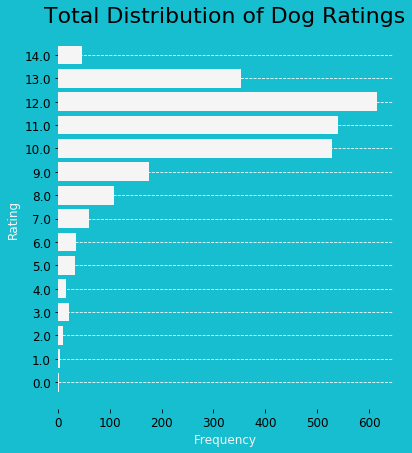

In [72]:
b='Black'
r = df_all.index
t = df_all.total
c= sns.color_palette()[9]
f_sz=12
w='whitesmoke'
fig = plt.figure(figsize=(6,7), facecolor=c)

            
ax = plt.subplot(1, 1, 1)
plt.barh(range(len(r)),t, color=w)
plt.yticks(range(len(r)),r,fontsize=12, color=b)
plt.ylabel('Rating',color=w,fontsize=f_sz)
plt.xticks(color=b,fontsize=f_sz)
plt.xlabel('Frequency',color=w,fontsize=f_sz)
plt.title('Total Distribution of Dog Ratings',color='Black',fontsize=22)

ax.set_axisbelow(True)
ax.yaxis.grid(color='white', linestyle='dashed')
plt.box(False)
plt.show()

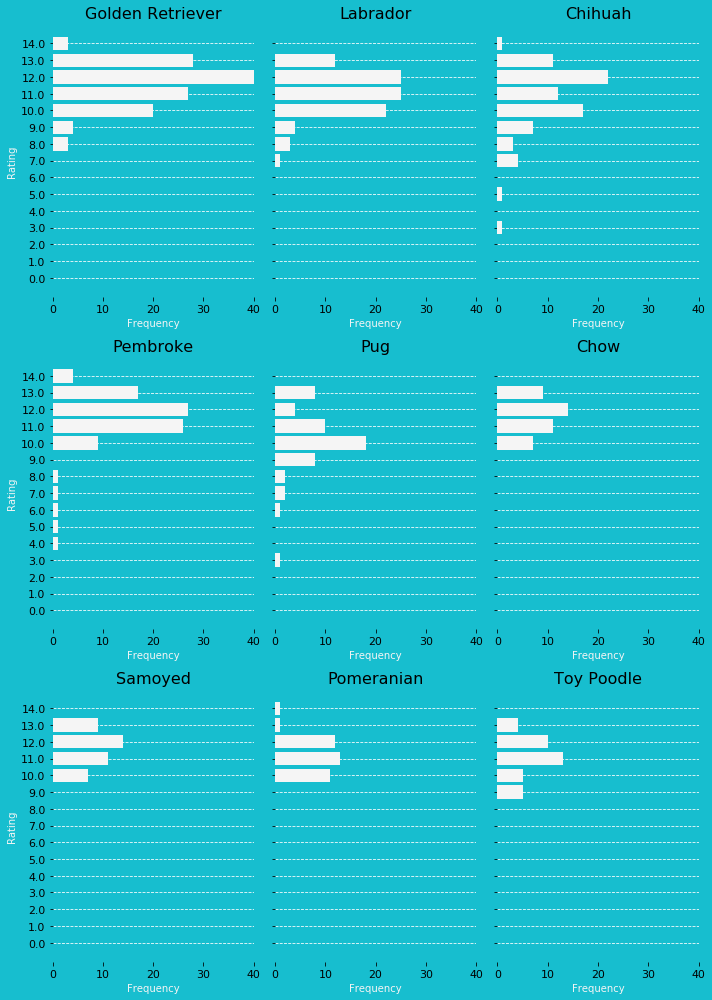

In [73]:
from mpl_toolkits.axes_grid1 import Grid
i = df_all.index
t = df_all.total
r = df_all.index
ch = df_all.chihuahua
g = df_all.golden_retriever
l = df_all.labrador_retriever
p = df_all.pembroke
pu = df_all.pug
ow = df_all.chow
s = df_all.samoyed
pm = df_all.pomeranian
tp = df_all.toy_poodle
c= sns.color_palette()[9]
w='whitesmoke'
b='Black'
f_sz=16
lim = [0,40]
fig = plt.figure(figsize=(10,14), facecolor=c)
grid = Grid(fig, rect=111, nrows_ncols=(2,2),
            axes_pad=0.25, label_mode='L')



ax1= plt.subplot(3, 3, 1)
plt.barh(range(len(r)),g, color=w)
plt.yticks(range(len(r)),r,fontsize=11,color=b)
plt.xticks(color=b,fontsize=11)
plt.xlabel('Frequency',color=w)
plt.ylabel('Rating',color=w)
plt.box(False)
plt.title('Golden Retriever',fontsize=f_sz,color=b)
plt.xlim(lim)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='white', linestyle='dashed')

ax2= plt.subplot(3, 3, 2)
plt.barh(range(len(r)),l, color=w)
plt.yticks(range(len(r)),r)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Labrador',fontsize=f_sz,color=b)
plt.xlim(lim)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='white', linestyle='dashed')

ax3 = plt.subplot(3, 3, 3)
plt.barh(range(len(r)),ch, color=w)
plt.yticks(range(len(r)),r)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Chihuah',fontsize=f_sz,color=b)
plt.xlim(lim)
ax3.set_axisbelow(True)
ax3.yaxis.grid(color='white', linestyle='dashed')

ax4 = plt.subplot(3, 3, 4)
plt.barh(range(len(r)),p, color=w)
plt.yticks(range(len(r)),r,fontsize=11,color=b)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.ylabel('Rating',color=w)
plt.box(False)
plt.title('Pembroke',fontsize=f_sz,color=b)
plt.xlim(lim)
ax4.set_axisbelow(True)
ax4.yaxis.grid(color='white', linestyle='dashed')

ax5 = plt.subplot(3, 3, 5)
plt.barh(range(len(r)),pu, color=w)
plt.yticks(range(len(r)),r)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax5.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Pug', fontsize=f_sz, color=b)
plt.xlim(lim)
ax5.set_axisbelow(True)
ax5.yaxis.grid(color='white', linestyle='dashed')

ax6 = plt.subplot(3, 3, 6)
plt.barh(range(len(r)),ow, color=w)
plt.yticks(range(len(r)),r)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax6.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Chow', fontsize=f_sz, color=b)
plt.xlim(lim)
ax6.set_axisbelow(True)
ax6.yaxis.grid(color='white', linestyle='dashed')

ax7 = plt.subplot(3, 3, 7)
plt.barh(range(len(r)),ow, color=w)
plt.yticks(range(len(r)),r,fontsize=11,color=b)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.ylabel('Rating',color=w)
plt.setp(ax7.get_yticklabels(), visible=True)
plt.box(False)
plt.title('Samoyed', fontsize=f_sz, color=b)
plt.xlim(lim)
ax7.set_axisbelow(True)
ax7.yaxis.grid(color='white', linestyle='dashed')

ax8 = plt.subplot(3, 3, 8)
plt.barh(range(len(r)),pm, color=w)
plt.yticks(range(len(r)),r,)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax8.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Pomeranian', fontsize=f_sz, color=b)
plt.xlim(lim)
ax8.set_axisbelow(True)
ax8.yaxis.grid(color='white', linestyle='dashed')

ax9 = plt.subplot(3, 3, 9)
plt.barh(range(len(r)),tp, color=w)
plt.yticks(range(len(r)),r,)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax9.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Toy Poodle', fontsize=f_sz, color=b)
plt.xlim(lim)
ax9.set_axisbelow(True)
ax9.yaxis.grid(color='white', linestyle='dashed')

plt.tight_layout()
plt.show()

# Time Series 

In [74]:
df_time = df.copy()

In [75]:
df_time['timestamp'].min(), df_time['timestamp'].max()

('2015-11-15 22:32:08 +0000', '2017-08-01 16:23:56 +0000')

In [76]:
time = df_time['timestamp']

In [77]:
time = list(time)

In [78]:
times = []
for i in range(len(time)): 
    t= time[i]
    stamp = t.rpartition(':')[0]
    times.append(stamp)

In [79]:
times[:5]

['2017-08-01 16:23',
 '2017-08-01 00:17',
 '2017-07-31 00:18',
 '2017-07-30 15:58',
 '2017-07-29 16:00']

In [80]:
df_time['timestamp'] = times

In [81]:
df_time['timestamp'] = pd.to_datetime(df_time['timestamp'])

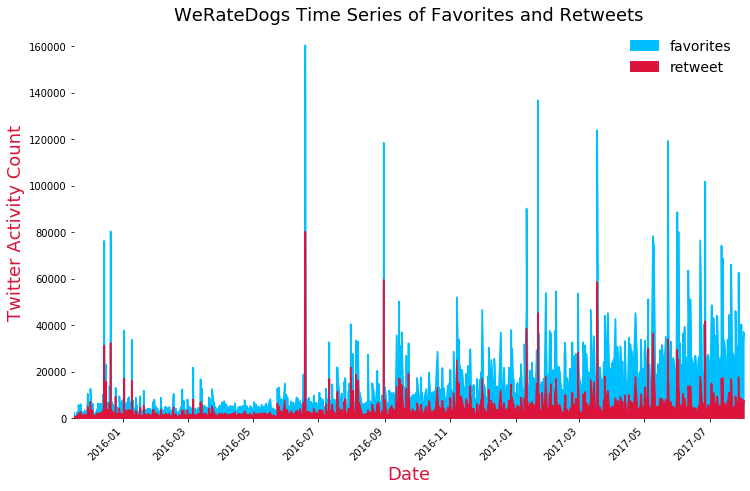

In [82]:
# TimeSeries of Twitter Activity 

#Favorite and Retweet series
time_faves = pd.Series(data=df_time['favorite_count'].values, index=df_time['timestamp'])
time_retweets = pd.Series(data=df_time['retweet_count'].values, index=df_time['timestamp'])

#Plotting both series to the same axis
size= (12,8)

time_faves.plot(kind='area',figsize=size, label='favorites',
                color='deepskyblue',legend=True)
time_retweets.plot(kind='area',figsize=size, label='retweet',
                   color='crimson',legend=True)

#Labels and preferences for the visualization

plt.title('WeRateDogs Time Series of Favorites and Retweets',fontsize=18)
plt.xlabel('Date',fontsize=18,color='crimson') 
plt.ylabel('Twitter Activity Count',fontsize=18, color='crimson')
plt.xticks(rotation=45)
plt.legend(fontsize=14,frameon=False)

plt.box(False)
plt.show();